In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms
from torch import functional as F
from VGG import VGGLoss
import os


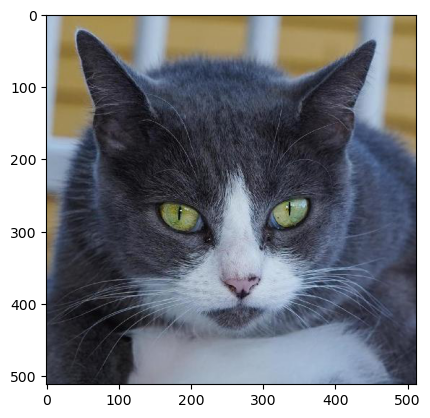

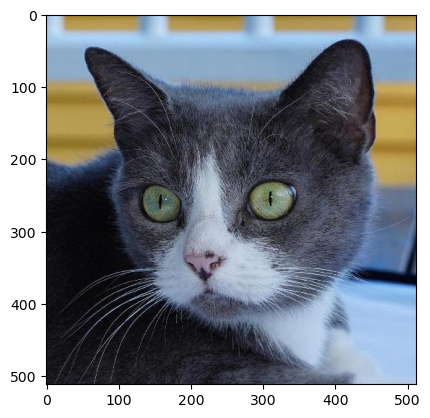

In [2]:
pic1 = "HR_images/flickr_cat_000005.jpg"
# pic2 = "building.jpg"
pic2 = "HR_images/flickr_cat_000006.jpg"
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = "cpu"

# load image with matplotlib
img = plt.imread(pic1)
plt.imshow(img)
plt.show()
img = plt.imread(pic2)
plt.imshow(img)
plt.show()


# Load the image
img1 = Image.open(pic1)
# img1.show()
im2 = Image.open(pic2).resize(img1.size)
# im2.show()

# Convert the image to a tensor
transform = transforms.ToTensor()
img1 = transform(img1)
img2 = transform(im2)

# Add a batch dimension
img1 = img1.unsqueeze(0).to(device)
img2 = img2.unsqueeze(0).to(device)

vgg = VGGLoss(device)
# print(vgg(img1, img2).item())


In [5]:
directory = "HR_images"
max = -1
min = 999999
max_im = ""
min_im = ""
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".jpg"):
        img2 = Image.open(os.path.join(directory, filename))
        img2 = transform(img2)
        img2 = img2.unsqueeze(0).to(device)
        temp = vgg(img1, img2).item()
        if temp > max:
            max = temp
            max_im = filename
        if temp < min and filename != "flickr_cat_000005.jpg":
            min = temp
            min_im = filename
        continue
    else:
        continue




OutOfMemoryError: CUDA out of memory. Tried to allocate 20.00 MiB (GPU 0; 2.00 GiB total capacity; 1.65 GiB already allocated; 0 bytes free; 1.66 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

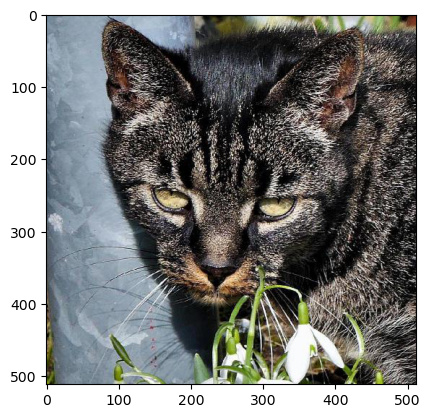

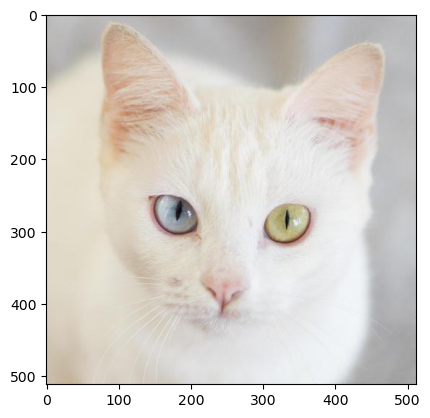

6.234492301940918
HR_images\flickr_cat_000303.jpg
2.4793295860290527
HR_images\flickr_cat_000016.jpg


In [ ]:
max_im_path = os.path.join(directory, max_im)
min_im_path = os.path.join(directory, min_im)

img1 = plt.imread(max_im_path)
plt.imshow(img1)
plt.show()
img1 = plt.imread(min_im_path)
plt.imshow(img1)
plt.show()
print(max)
print(max_im_path)
print(min)
print(min_im_path)

In [3]:
directory = "HR_images"

var_list = []
counter = 0
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".jpg") and counter < 500:
        img2 = Image.open(os.path.join(directory, filename))
        img2 = transform(img2)
        img2 = img2.unsqueeze(0).to(device)
        temp, templist = vgg(img1, img2)
        var_list.append(templist)
        counter+=1
        print(counter)
    elif counter == 500:
        break
    else:
        continue

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32


KeyboardInterrupt: 

In [4]:
# find the variance of the columns of the list
variance_list = np.array(var_list)
print(variance_list.shape)
variance_list = np.transpose(variance_list)
print(variance_list.shape)
variance_list = np.var(variance_list, axis=1)
print(variance_list, "\n")
variance_list = np.sort(variance_list)
print(variance_list)

(32, 16)
(16, 32)
[2.27515349e-05 1.75500112e-03 9.10104572e-03 2.56777782e-02
 9.74766649e-02 1.63829154e-01 3.05166286e-01 2.93586377e-01
 3.50058741e-01 1.42115988e-01 5.40707709e-02 9.95169117e-03
 1.95025293e-02 9.30708285e-03 5.72333410e-03 1.55570982e-03] 

[2.27515349e-05 1.55570982e-03 1.75500112e-03 5.72333410e-03
 9.10104572e-03 9.30708285e-03 9.95169117e-03 1.95025293e-02
 2.56777782e-02 5.40707709e-02 9.74766649e-02 1.42115988e-01
 1.63829154e-01 2.93586377e-01 3.05166286e-01 3.50058741e-01]
